<a href="https://colab.research.google.com/github/PetrusAriaa/modeling-and-simulation-project/blob/master/fish_movement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation

from fish_movement import Fish, Food

## Simulation

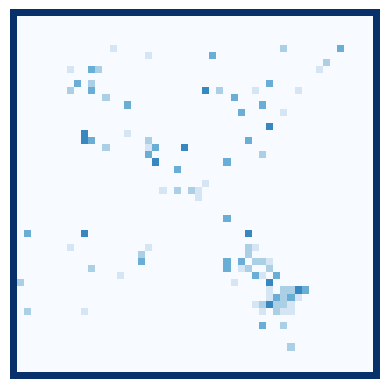

In [3]:
fish = Fish(shape=50, n_fishes=100)
food = Food(50)
fish_grid = fish.generate()
food_grid = food.get_food_grid()

fig, ax = plt.subplots()
ax.axis('off')

count = 0
def update(i):
  fish.sense(food_grid)
  fish.swim()
  if i == 10:
    food.feed(40,40)
  if i == 40:
    food.feed(27,25)
  if i == 60:
    food.feed(10,10)
  if i%2 == 0:
    food.dissolve()
  im = ax.imshow(fish_grid, cmap='Blues')
  return im,

animate = FuncAnimation(fig, update, repeat=True, frames=50, interval=50)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
animate.save('final_result.gif', writer=writer)

plt.show()